**Candidate: Sneha Santha Prabakar**


**Assignment: Week 3 - ANN**

In [189]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
import os
folder_path = '/content/drive/My Drive/NUS-GenAI'
os.chdir(folder_path)

In [191]:
import warnings
warnings.filterwarnings('ignore')

# Section 1: Import data and libraries

## Import libraries

In [192]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sklearn - preprocessing, model selection, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)

# Handling class imbalance
from imblearn.over_sampling import SMOTE

# TensorFlow/Keras - model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import random
import tensorflow as tf
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)


## Import dataset

In [193]:
# import dataset

df = pd.read_csv('enhanced_diabetes_dataset.csv')
df.head()

,Age,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes,Diabetes
0,52,1,1,124,95.0,20.0,0,36.0,0.078,4.7,87,142.0,37.0,0,3.3,0,1
1,43,1,2,144,86.0,23.0,3,32.9,0.118,6.3,135,162.0,89.0,0,5.2,1,1
2,55,1,4,141,113.0,18.0,297,43.4,0.139,5.4,113,180.0,45.0,1,0.0,1,0
3,68,1,3,125,110.0,32.0,210,22.7,0.197,5.2,93,262.0,56.0,0,4.1,0,1
4,41,0,0,177,92.0,14.0,189,38.1,0.078,10.5,126,332.0,66.0,0,3.8,0,1


## Overview of the dataset

**Size of the dataset**

In [194]:
df.shape

(2000, 17)

The dataset has 17 columns and 2,000 rows. This is a reasonable data size to build a neural network.

**Data type of the columns**

In [195]:
columns_datatype = df.dtypes.reset_index()
columns_datatype.columns = ['Column', 'Data type']
columns_datatype

,Column,Data type
0,Age,int64
1,Gender,int64
2,Pregnancies,int64
3,Glucose,int64
4,BloodPressure,float64
5,SkinThickness,float64
6,Insulin,int64
7,BMI,float64
8,DiabetesPedigreeFunction,float64
9,HbA1c,float64


In [196]:
# num unique values per column
df.nunique()

,0
Age,61
Gender,2
Pregnancies,11
Glucose,140
BloodPressure,66
SkinThickness,46
Insulin,377
BMI,286
DiabetesPedigreeFunction,647
HbA1c,77


We have a dataset containing **16 features** and 1 independent variable (*Diabetes*).

All the features are numeric (with a mix of integer and float data types).

The independent variable, also the target variable of this analysis, is a binary column. Hence, this is a **classification** problem.

The features can be broadly divided into the following categories:

1. General characteristics of the individual
  * Age
  * Gender
  * BMI
  * Skin thickness
  * Smoking
  * Physical activity
2. Diabetes markers
  * Glucose
  * Insulin
  * Diabetes Pedigree Function
  * HbA1c
  * FastingBS
  * Prediabetes
3. Other health conditions
  * Blood Pressure
  * Pregnancies
  * Triglycerides
  * HDL

**Summary of Statistics of the dataset**

In [197]:
# Basic information of the dataset

# drop the categorical columns (Gender, Smoking, Prediabetes, Diabetes)
df_numeric = df.drop(columns=['Gender', 'Smoking', 'Prediabetes', 'Diabetes'])

# Display the statistics for the numeric columns
df_numeric.describe()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,PhysicalActivity
count,2000.000000,2000.000000,2000.000000,1902.000000,1914.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1909.000000,1904.000000,1899.000000
mean,45.858500,1.557000,127.156000,89.005258,22.551724,110.316500,29.493850,0.304637,6.179000,95.090000,196.518072,49.630777,2.849236
std,14.155164,1.758208,28.018051,12.119690,8.843040,114.417333,6.038741,0.289355,1.705257,22.969343,83.285277,16.232860,2.756191
min,20.000000,0.000000,70.000000,60.000000,5.000000,0.000000,16.000000,0.078000,4.000000,50.000000,50.000000,20.000000,0.000000
25%,36.000000,0.000000,107.000000,81.000000,16.000000,0.000000,25.400000,0.083750,4.700000,79.000000,137.000000,38.000000,0.700000
50%,46.000000,1.000000,126.000000,89.000000,22.000000,88.000000,29.550000,0.213000,6.000000,94.500000,195.000000,50.000000,2.200000
75%,55.000000,3.000000,146.000000,97.000000,28.000000,195.000000,33.600000,0.391250,7.400000,110.000000,256.000000,61.000000,4.200000
max,80.000000,10.000000,222.000000,130.000000,50.000000,548.000000,49.400000,2.500000,12.000000,171.000000,463.000000,100.000000,20.000000


Statistical summary makes sense only for continuous variables. Hence, we remove the independent variable and the categorical variables while performing the statistical summary analysis. This leaves us with **13 continuous variable** columns.

We can make the following observations from the statistical summary of the continuous variable columns:

*   The count of all features is not 2000, some features have count lesser than 2000. This indicates the **presence of missing values** in certain features.
*   The following features have a mean that is approximately equal to the median (indicating a uniform normal distribution):
  1. Age
  2. Glucose
  3. Blood Pressure
  4. Skin thickness
  5. BMI
  6. HbA1c
  7. FastingBS
  8. Triglycerides
  9. HDL
* The following features indicate a skewed distribution:
  1. Insulin | Mean > Median | **Right-skewed** distribution
  2. DiabetesPedigreeFunction | Mean > Median | **Right-skewed** distribution
  3. PhysicalActivity | Mean slightly more than the Median | *Lightly right-skewed* distribution
  4. Pregnancies | Mean slightly more than the Median | *Lightly right-skewed* distribution
* Features like Insulin and Triglycerides have very high standard deviation compared to their mean which may suggest a **high spread**/variance.
* Contextual analysis: The minimum value of Insulin is 0. This may indicate an **error in data reporting** or a missing value encoding, as it is medically not possible for anyone to have Insuling as 0 mu U/ml.
* Presence of **outliers** - some features such as Insulin, have very high max value compared to their median, which may indicate the presence of outliers.



# Section 2: EDA Visualization

## Distribution plots comparing features between Diabetic and Non-Diabetic patients

In [198]:
diabetic_patients = df[df['Diabetes'] == 1]
non_diabetic_patients = df[df['Diabetes'] == 0]

print(f'Number of diabetic patients: {len(diabetic_patients)}')
print(f'Number of non-diabetic patients: {len(non_diabetic_patients)}')

Number of diabetic patients: 1608
Number of non-diabetic patients: 392


In [199]:
perc_diabetic = (len(diabetic_patients) / len(df)) * 100
perc_non_diabetic = (len(non_diabetic_patients) / len(df)) * 100

print(f'Percentage of diabetic patients: {perc_diabetic:.1f}%')
print(f'Percentage of non-diabetic patients: {perc_non_diabetic:.1f}%')

Percentage of diabetic patients: 80.4%
Percentage of non-diabetic patients: 19.6%


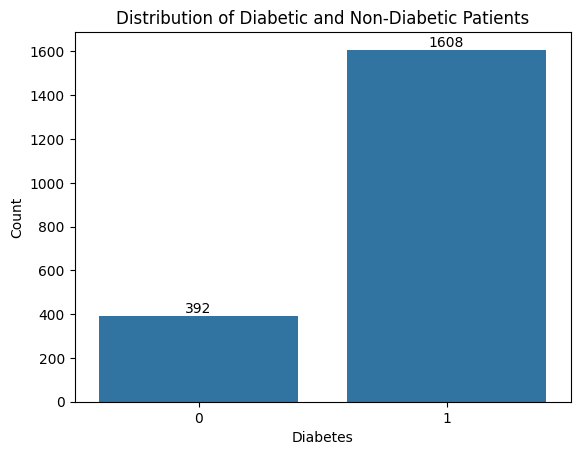

In [200]:
ax = sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetic and Non-Diabetic Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# adding count label on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

We can see that the dataset is **heavily imbalanced** - the number of patients **with diabetes** make up a staggering **majority** (80.4%) while the number of patients **without diabetes** are **very few** in comparison (only 19.6%). Using such data to train a machine learning model will make the model biased towards patients with diabetes and it will perform poorly to correctly detect patients without diabetes. Hence, this imablance of classes in the dataset needs to be handled before we start training the model.

Let us also compare the distribution of features across both the classes.

For integer features, we will plot the bar chart to see the distribution.

For continuous (numeric) features, we will plot the density plots to see the distribution.

In [201]:
df.dtypes

,0
Age,int64
Gender,int64
Pregnancies,int64
Glucose,int64
BloodPressure,float64
SkinThickness,float64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
HbA1c,float64


In [202]:
int_features = df.dtypes[df.dtypes == 'int64'].index.to_list()
int_features.remove('Diabetes') # since Diabetes is not a feature; it is the independent variable

cont_features = df.dtypes[df.dtypes == 'float64'].index.to_list()

print(f'Integer features: {int_features}')
print(f'Continuous features: {cont_features}')

Integer features: ['Age', 'Gender', 'Pregnancies', 'Glucose', 'Insulin', 'FastingBS', 'Smoking', 'Prediabetes']
Continuous features: ['BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'HbA1c', 'Triglycerides', 'HDL', 'PhysicalActivity']


In [203]:
# Part 1: Integer features distribution - Bar plot

## !! Add a curve on top of the bars, if possible

for feature in int_features:

  fig = px.histogram(df,
                   x=feature,
                   color='Diabetes',
                   barmode='group',
                   text_auto=True,
                   color_discrete_map={0: 'blue', 1: 'orange'})

  fig.update_layout(title=f'Distribution of {feature} by Diabetes',
                    xaxis_title=feature,
                    yaxis_title='Count')

  fig.show()


In [204]:
# Distribution for continous features

for feature in cont_features:
    fig = px.histogram(df,
                   x=feature,
                   color='Diabetes',
                   facet_col='Diabetes',
                   histnorm='probability density',
                   opacity=0.7)

    fig.update_layout(
        title=f'Distribution of {feature} by Diabetes Status',
        xaxis_title=feature,
        yaxis_title='Density',
        plot_bgcolor='white',
        paper_bgcolor='white',
        showlegend=False
    )

    fig.show()


## Correlation Analysis

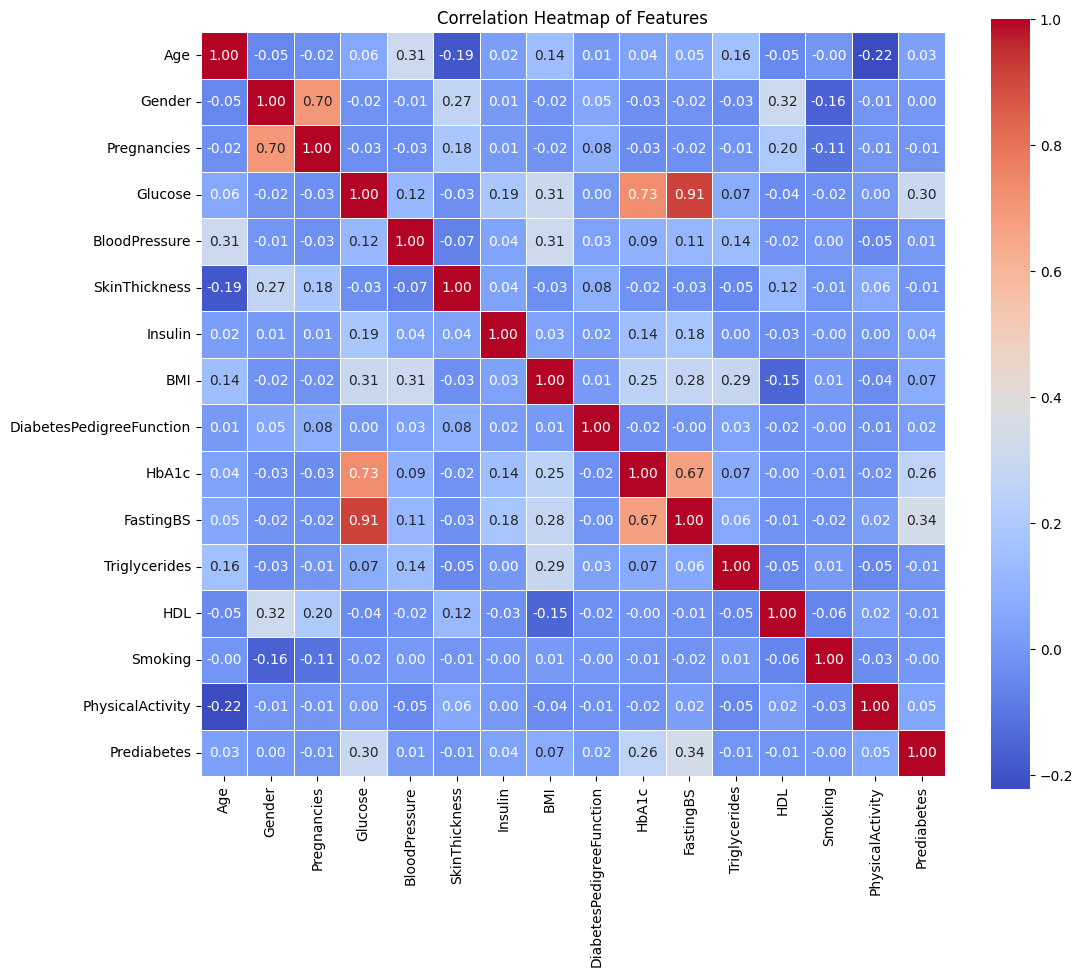

In [205]:
df_corr = df.drop(columns=['Diabetes'])
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,         # show correlation values
            fmt='.2f',           # format to 2 decimal places
            cmap='coolwarm',     # color map
            square=True,         # make cells square
            linewidths=0.5)      # line width between squares
plt.title('Correlation Heatmap of Features')
plt.show()

We can see that the following features have high positive correlation (>=0.7):



*   Gender and Pregnancies (0.7)
*   HbA1c and Glucose (0.73)
*   FastingBS and Glucose (0.91)

FastingBS and Glucose also have a strong positive correlation (0.67), but it is still less than 0.7 and hence, not strong enough to cause multi-collinearity.

We need to remove strongly correlated features in order to avoid multi-collinearity in our model. This means that in each pair of the strongly correlated features, we need to remove one feature.

We can do a Feature Importance analysis in order to choose which features to keep and which to remove.




## Feature Importance

We use a Random Forest model in order to determine the feature importance because:



*   It **captures non-linear relationships** between the features and the target well.
*   It can handle **both int and continous variables**.
*   It is **robust to outliers** (this is important since we have some features, such as HbA1c which have outliers)
*   It is fast to train, works well on large datasets, and **easy to interpret feature importance** from the model
*   Reliable result as:
  - It builts multiple trees
  - Every time a tree is built, it chooses splits that reduce the impurity and better features are used more often and early on, in the trees.
  - It then sums how much each feature reduced impurity across all trees
  - Then averages this to give the final feature importance score.




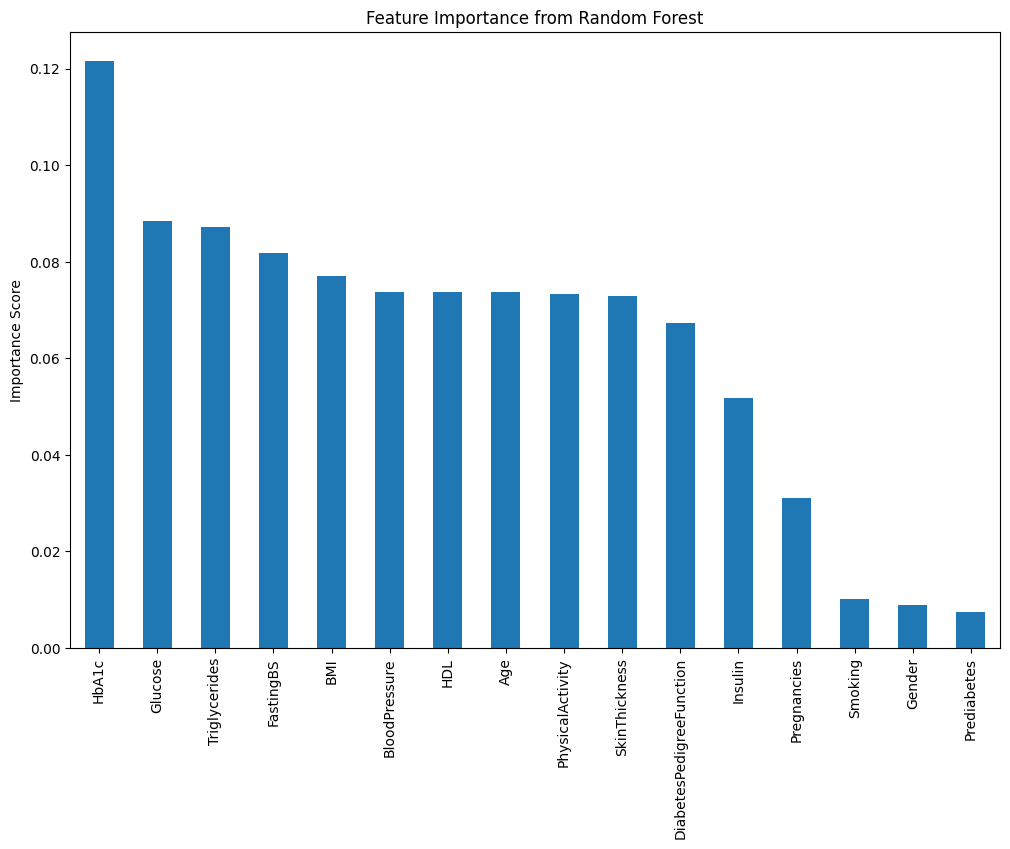

In [206]:
X = df.drop(columns='Diabetes')
y = df['Diabetes']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()

We can clearly see that the top 5 most important features are:

1. HbA1c
2. Glucose
3. Triglycerides
4. FastingBS
5. BMI


The least important features are:
1. Smoking
2. Gender
3. Prediabetes


Earlier we found out that the following pairs have high-correlation:
1. Gender and Pregnancies (0.7)
2. HbA1c and Glucose (0.73)
3. FastingBS and Glucose (0.91)


Using our knowledge from the correlation analysis and feature importance, we can determine that the following features can be removed (to avoid multi-collinearity in the model):

1. Gender - it is anyway a low-importance feature
2. Glucose - though it is rated high in feature importance, HbA1c has a much higher feature importance score than all the features. So between HbA1c and Glucose, we choose to remove Glucose. Removing Glucose would also break the multi-collinearity between FastingBS and Glucose.

Let us re-plot the correlation matrix after removing these two features, to make sure there is no multi-collinearity in the dataset anymore.

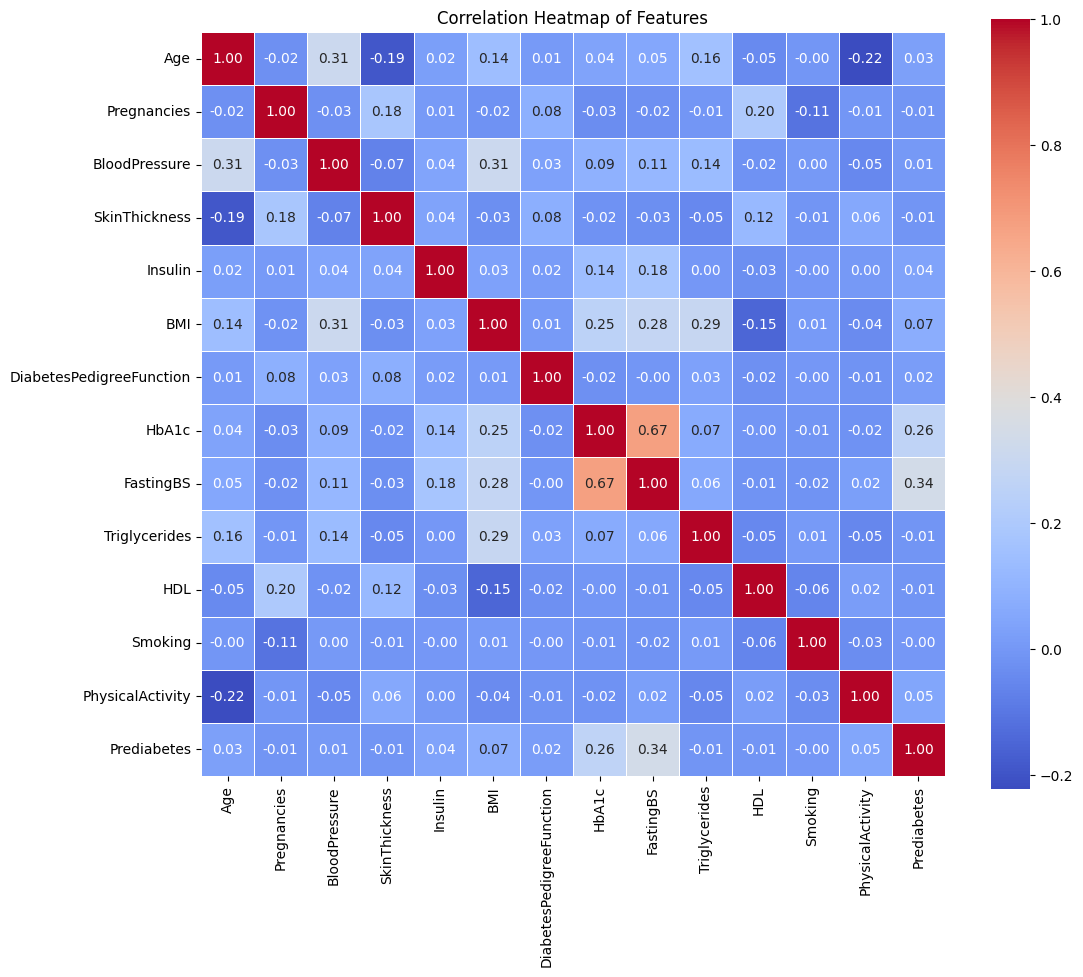

In [207]:
removed_cols = df[['Gender', 'Glucose']]
df.drop(columns=['Gender', 'Glucose'], inplace=True)

df_corr = df.drop(columns=['Diabetes'])
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,         # show correlation values
            fmt='.2f',           # format to 2 decimal places
            cmap='coolwarm',     # color map
            square=True,         # make cells square
            linewidths=0.5)      # line width between squares
plt.title('Correlation Heatmap of Features')
plt.show()

We can see that there is no more multi-collinearity in the dataset anymore.

# Section 3: Data Quality

## Check for empty records

In [208]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_summary = pd.concat([missing_values,
                             (missing_values / len(df) * 100).map(lambda x: f'{x:.1f}%')
                             ],
                            axis=1)
missing_summary.columns = ['Count of missing values', 'Percentage of dataset']

missing_summary

,Count of missing values,Percentage of dataset
PhysicalActivity,101,5.1%
BloodPressure,98,4.9%
HDL,96,4.8%
Triglycerides,91,4.5%
SkinThickness,86,4.3%


We can see that the missing values make up roughly 5% of the dataset. Though it is not too significant, it is not very small either. Hence, we will retain these records and impute the missing values with either mean or median of the feature.


Let us review the statistical summary of these features to determine the best method for imputing the missing values:

In [209]:
df_missing_cols = df[['PhysicalActivity', 'BloodPressure', 'HDL', 'Triglycerides', 'SkinThickness']]
df_missing_cols.describe()

,PhysicalActivity,BloodPressure,HDL,Triglycerides,SkinThickness
count,1899.000000,1902.000000,1904.000000,1909.000000,1914.000000
mean,2.849236,89.005258,49.630777,196.518072,22.551724
std,2.756191,12.119690,16.232860,83.285277,8.843040
min,0.000000,60.000000,20.000000,50.000000,5.000000
25%,0.700000,81.000000,38.000000,137.000000,16.000000
50%,2.200000,89.000000,50.000000,195.000000,22.000000
75%,4.200000,97.000000,61.000000,256.000000,28.000000
max,20.000000,130.000000,100.000000,463.000000,50.000000


Based on the statistical summary, we can impute the missing values with mean for the features with uniform distribution (where mean is approx equal to median) - BloodPressure, SkinThickness.

We can impute the missing values with median for the features with slightly skewed distribution (where mean is lesser or greater than the median) - PhysicalActivity, HDL, Triglycerides.

In [210]:
# Mean imputation

mean_imputation_cols = ['BloodPressure', 'SkinThickness']
df[mean_imputation_cols] = df[mean_imputation_cols].fillna(df[mean_imputation_cols].mean())

# Median imputation

median_imputation_cols = ['PhysicalActivity', 'HDL', 'Triglycerides']
df[median_imputation_cols] = df[median_imputation_cols].fillna(df[median_imputation_cols].median())

In [211]:
df.isna().sum()

,0
Age,0
Pregnancies,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
HbA1c,0
FastingBS,0
Triglycerides,0


There are no missing values in the dataset anymore.

Let us also check for zero-values in the dataset and verify that they are medically and statistically logical.

In [212]:
zero_stats = (df == 0).sum()
zero_stats = zero_stats[zero_stats > 0].sort_values(ascending=False)
print(zero_stats)

Smoking             1555
Prediabetes         1155
Pregnancies          862
Insulin              737
Diabetes             392
PhysicalActivity     278
dtype: int64


In [213]:
df.describe()

,Age,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes,Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.858500,1.557000,89.005258,22.551724,110.316500,29.493850,0.304637,6.179000,95.090000,196.449000,49.648500,0.222500,2.816450,0.422500,0.804000
std,14.155164,1.758208,11.818875,8.650729,114.417333,6.038741,0.289355,1.705257,22.969343,81.368125,15.838478,0.416029,2.689422,0.494081,0.397068
min,20.000000,0.000000,60.000000,5.000000,0.000000,16.000000,0.078000,4.000000,50.000000,50.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,81.000000,17.000000,0.000000,25.400000,0.083750,4.700000,79.000000,140.000000,39.000000,0.000000,0.700000,0.000000,1.000000
50%,46.000000,1.000000,89.005258,22.551724,88.000000,29.550000,0.213000,6.000000,94.500000,195.000000,50.000000,0.000000,2.200000,0.000000,1.000000
75%,55.000000,3.000000,97.000000,28.000000,195.000000,33.600000,0.391250,7.400000,110.000000,252.000000,60.000000,0.000000,4.000000,1.000000,1.000000
max,80.000000,10.000000,130.000000,50.000000,548.000000,49.400000,2.500000,12.000000,171.000000,463.000000,100.000000,1.000000,20.000000,1.000000,1.000000


It is natural to have 0 value in most of these columns, except Insulin:

- Smoking, Prediabetes, Diabetes: Binary variables where 0 indicates the absence of the condition in the person
- Pregnancies: It is perfectly logical for a person to have 0 pregnancies in their medical history
- Physical Activity: Value = 0 refers to people who have no physical activity; also realistic.


It is unnatural for people to have insulin level = 0, even if they are diabetic. Some people with Type 1 Diabetes may have very low insulin close to 0, but it is almost not possible for anyone to have insulin=0. Hence, let us dig deeper into records where insulin = 0 to see if it is a genuine data or a case of incorrectly reported data.

In [214]:
zero_insulin_df = df[df['Insulin'] == 0]
print(f'Num records with Insulin = 0: {zero_insulin_df.shape[0]}')
print(f'Percentage of records with Insulin = 0: {len(zero_insulin_df) / len(df) * 100:.1f}%')

zero_insulin_diabetic = zero_insulin_df[zero_insulin_df['Diabetes'] == 1]
print(f'Num Diabetic patients with Insulin = 0: {zero_insulin_diabetic.shape[0]}')

zero_insulin_non_diabetic = zero_insulin_df[zero_insulin_df['Diabetes'] == 0]
print(f'Num non-Diabetic patients with Insulin = 0: {zero_insulin_non_diabetic.shape[0]}')

Num records with Insulin = 0: 737
Percentage of records with Insulin = 0: 36.9%
Num Diabetic patients with Insulin = 0: 579
Num non-Diabetic patients with Insulin = 0: 158


A significant proportion of records (36.9%) have patients with Insulin = 0. Hence, we cannot ignore this case.

It is surprising that 158 patients (21% of these records) are non-diabetic patients - which is clinically not possible. It is possible that 0 will simply used to impute the records with missing values for this column. However, it is not a logical imputation as it does not make sense medically and it will mislead the model.

Hence, we first revert these 0 values to NA, and find a logically correct way to impute these records.

In [215]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)
median_insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].fillna(median_insulin)

Let us also check other features where there might be 0 values in the records, but medically it does not make sense to have it.

Features, other than Insulin, where it does not make sense to have 0 readings are: 'BloodPressure', 'SkinThickness', 'BMI','HbA1c', 'FastingBS', 'Triglycerides', 'HDL'

In [216]:
non_zero_cols = ['BloodPressure', 'SkinThickness', 'BMI','HbA1c', 'FastingBS', 'Triglycerides', 'HDL']

for col in non_zero_cols:
  num_zero = df[df[col]==0].shape[0]
  print(f'Num records with {col} = 0: {num_zero}')

Num records with BloodPressure = 0: 0
Num records with SkinThickness = 0: 0
Num records with BMI = 0: 0
Num records with HbA1c = 0: 0
Num records with FastingBS = 0: 0
Num records with Triglycerides = 0: 0
Num records with HDL = 0: 0


In [217]:
df.isna().sum()

,0
Age,0
Pregnancies,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
HbA1c,0
FastingBS,0
Triglycerides,0


We can see that none of these fields have suspicious zeros. We have also confirmed that there are no more missing records.

## Check for Outliers

So far - we have removed two columns - Gender and Glucose - from the dataset, to avoid multi-collinearity.

And we have handled missing values and zeroes in the features.

We now have 14 features for our model. The next step in checking data quality is handling Outliers.

In [218]:
len(df.drop(columns=['Diabetes']).columns)

14

We will use **Boxplot** to detect outliers

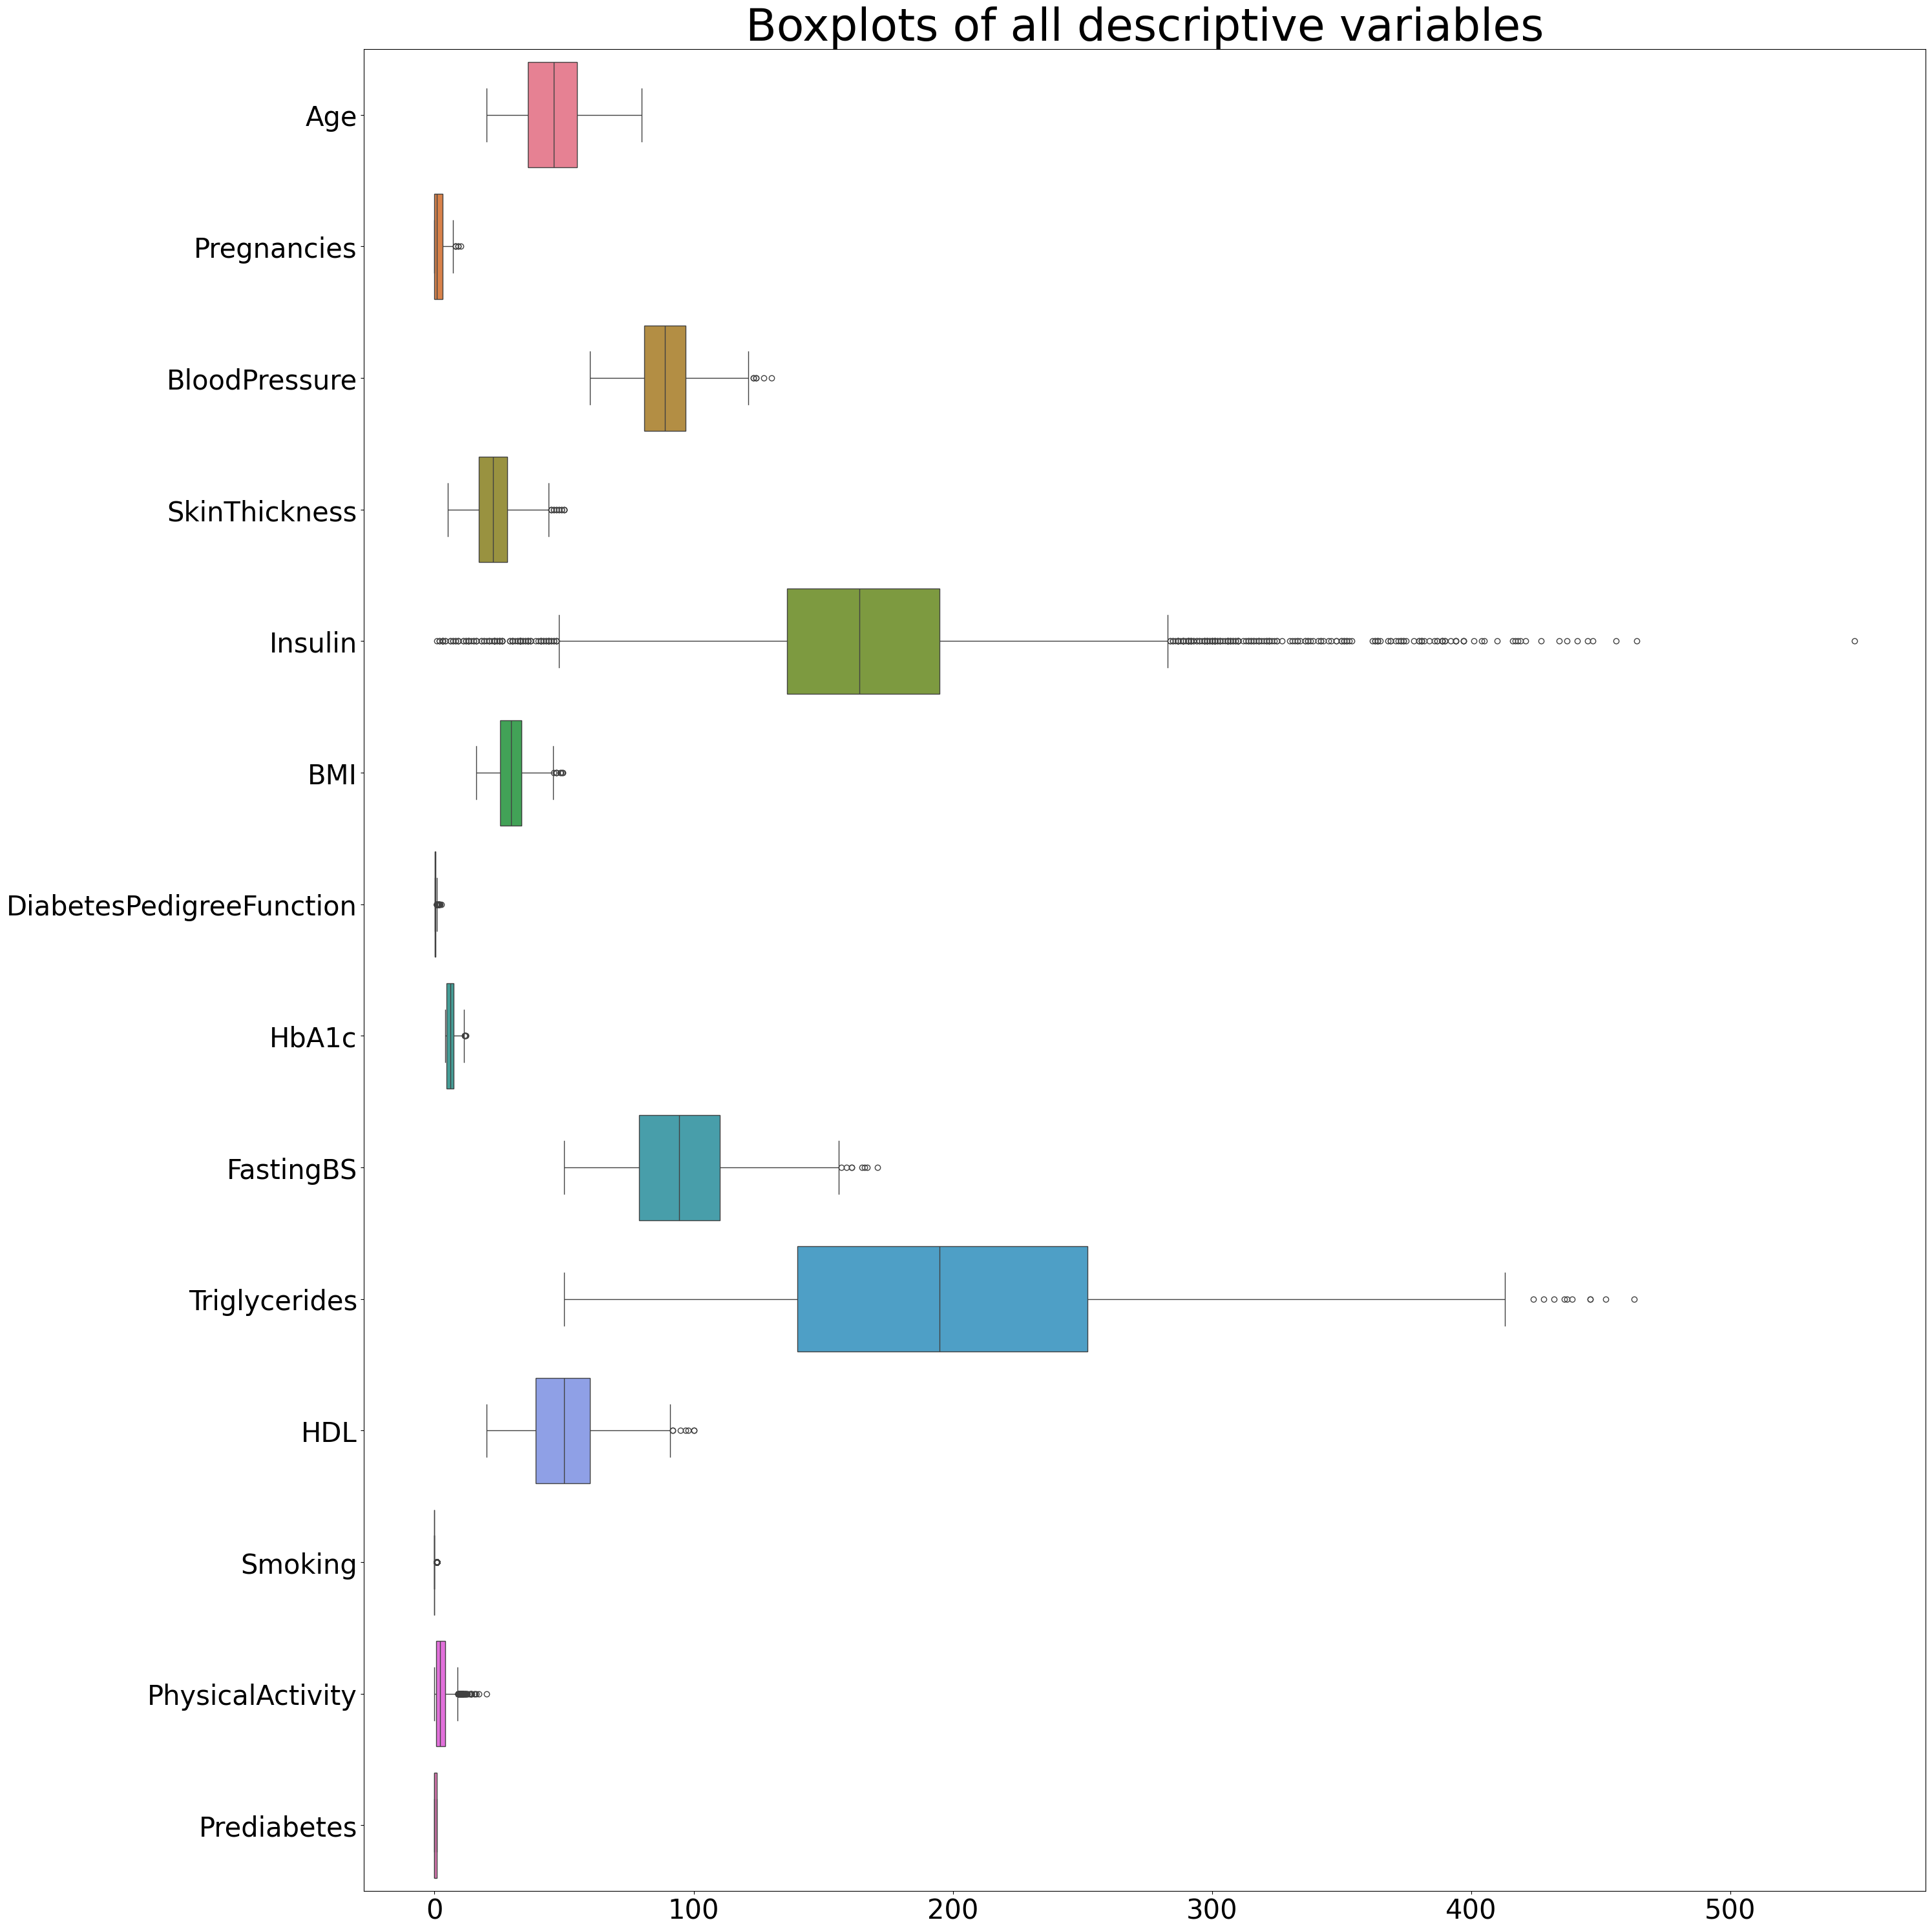

In [219]:
features_df = df.drop(columns=['Diabetes'])
plt.figure(figsize=(30, 30))
sns.boxplot(data=features_df, orient='h')
plt.title('Boxplots of all descriptive variables', fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()
plt.show()

The boxplot reveals that almost all features except Age and Prediabetes have outliers (data points outside the whisker).


We have already taken care of cases where the feature having value = 0 is biologically not possible.

We can also Cap extreme high-end outliers (winsorization) at the 99th percentile. This means we are limiting extreme values to a threshold (the 99th percentile), without
not deleting or excluding those records. This is important because, for example, outliers like Insulin > 500 distort ANN training. Following the winsorization approach, we still retain these records (as they may be medically relevant) while also limiting any extreme effects on our model training.

Performing standardization after this will further stabilize the dataset for model training.

In [220]:
feature_cols = df.drop(columns=['Diabetes']).columns

for col in feature_cols:
    cap = df[col].quantile(0.99)
    df[col] = np.where(df[col] > cap, cap, df[col])

df.drop(columns=['Diabetes']).describe()

,Age,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.858500,1.543000,88.970258,22.519224,170.41850,29.472810,0.302299,6.171160,95.021000,196.200000,49.598600,0.222500,2.793960,0.422500
std,14.155164,1.713949,11.725095,8.563741,76.42358,5.982043,0.277823,1.683562,22.784581,80.686642,15.709328,0.416029,2.596524,0.494081
min,20.000000,0.000000,60.000000,5.000000,1.00000,16.000000,0.078000,4.000000,50.000000,50.000000,20.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,81.000000,17.000000,136.00000,25.400000,0.083750,4.700000,79.000000,140.000000,39.000000,0.000000,0.700000,0.000000
50%,46.000000,1.000000,89.005258,22.551724,164.00000,29.550000,0.213000,6.000000,94.500000,195.000000,50.000000,0.000000,2.200000,0.000000
75%,55.000000,3.000000,97.000000,28.000000,195.00000,33.600000,0.391250,7.400000,110.000000,252.000000,60.000000,0.000000,4.000000,1.000000
max,80.000000,6.000000,117.000000,43.000000,397.00000,43.901000,1.432270,10.301000,150.000000,398.000000,86.010000,1.000000,11.601000,1.000000


# Section 4: Data Pre-Processing

The Data Pre-Processing steps are:



1.   Split the dataset into features (X) and target variable (Y)
2.   Split the features and target variable into 70% train, 15% val, 15% test
  - It is necessary to split the dataset into trian-test-validation sets before we do Standardization, because we are supposed to "fit" the Scaler only on Train data, not on Test/Validation data.
    - Scaling should only be fit on the training data to prevent data leakage.
If we scale the full dataset first, the scaler “sees” distribution of test/validation data, which leads to inflated model performance. *The Validation and test dataset should reflect real-word class distribution.*
  - We will perform Stratified splitting in order to ensure we have both the classes (Diabetic and non-diabetic patients) in all 3 datasets (train, test and validation)
3. Handle Class Imbalance - We already know that the dataset is heavily imbalanced. Hence, we will performe SMOTE sampling (only in the training set) to balance the classes while training the model (to avoid bias).
  - SMOTE should not be applied to test or validation sets because it synthetically creates samples and can skew evaluation metrics.
It should be used only to improve class balance during training.



## Split data

In [221]:
# Drop columns that are not features
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

In [222]:
# Train-Test-Validation split (70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

## Handle Class Imbalance

In [223]:
# Apply SMOTE on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Standardize the features

In [224]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


We can now check that:
1. All 3 sets - train/test/validation - have both diabetic and non-diabetic patients
2. The training data is well-balanced between both the classes.
3. The data split: 75-15-15 for train-validate-test sets is correct

In [225]:
y_train_resampled.value_counts() # after SMOTE

,count
Diabetes,
1,1126
0,1126


In [226]:
y_val.value_counts()

,count
Diabetes,
1,241
0,59


In [227]:
y_test.value_counts()

,count
Diabetes,
1,241
0,59


# Section 5: Designing the model

Theoretically the model would perform better if designed as a deep neural network instead of CNN:

CNNs (Convolutional Neural Networks) are designed for:
- Image data or Spatial or grid-like structures (e.g., 2D images, 1D time series, video frames)
- Use filters/kernels to extract spatial features (edges, shapes, textures)

This dataset is tabular, with:
- Structured columns: 'Pregnancies', 'Glucose', 'BloodPressure', etc.
- Each row represents a single patient record — not a sequence, image, or spatial structure
- No local relationships or “spatial patterns” between features (e.g., Glucose and BMI aren’t adjacent pixels)


CNNs expect input with spatial dimensions (e.g., 28×28 pixel images with 3 channels), but this dataset is a flat vector of health metrics.

Applying convolution on such unrelated features confuses the model (e.g., sliding a 3×3 kernel across unrelated columns like Age, BMI, Insulin doesn't make sense).

ANNs work well for tabular/structured data, where all features contribute to prediction but don’t have spatial locality. And each feature in this dataset is independent, and relationships between them are best captured using dense connections.

We can do both CNN and ANN to compare the results:




## Model 1: CNN

In [228]:
# Reshape for Conv1D input: (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [229]:
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [230]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('cnn_best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

cnn_history = cnn_model.fit(
    X_train_cnn, y_train_resampled,
    validation_data=(X_val_cnn, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
59/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 0.6765

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5802 - loss: 0.6740 - val_accuracy: 0.5867 - val_loss: 0.6618 - learning_rate: 0.0010
Epoch 2/50
63/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 0.6338

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.6329 - val_accuracy: 0.5900 - val_loss: 0.6591 - learning_rate: 0.0010
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.6153 - val_accuracy: 0.5767 - val_loss: 0.6637 - learning_rate: 0.0010
Epoch 4/50
63/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - loss: 0.6062

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 0.6067 - val_accuracy: 0.6100 - val_loss: 0.6560 - learning_rate: 0.0010
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6986 - loss: 0.6053 - val_accuracy: 0.5933 - val_loss: 0.6609 - learning_rate: 0.0010
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6812 - loss: 0.6040 - val_accuracy: 0.5900 - val_loss: 0.6606 - learning_rate: 0.0010
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.5978 - val_accuracy: 0.5867 - val_loss: 0.6721 - learning_rate: 0.0010
Epoch 8/50
58/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.6037

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6881 - loss: 0.6026 - val_accuracy: 0.6033 - val_loss: 0.6479 - learning_rate: 5.0000e-04
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6903 - loss: 0.5939 - val_accuracy: 0.6033 - val_loss: 0.6545 - learning_rate: 5.0000e-04
Epoch 10/50
63/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.5925

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6874 - loss: 0.5928 - val_accuracy: 0.6100 - val_loss: 0.6471 - learning_rate: 5.0000e-04
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.5909 - val_accuracy: 0.6067 - val_loss: 0.6502 - learning_rate: 5.0000e-04
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6965 - loss: 0.5955 - val_accuracy: 0.5933 - val_loss: 0.6568 - learning_rate: 5.0000e-04
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6955 - loss: 0.5881 - val_accuracy: 0.6067 - val_loss: 0.6538 - learning_rate: 5.0000e-04
Epoch 14/50
59/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5899

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.5907 - val_accuracy: 0.6200 - val_loss: 0.6425 - learning_rate: 2.5000e-04
Epoch 15/50
67/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5948

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6906 - loss: 0.5948 - val_accuracy: 0.6200 - val_loss: 0.6425 - learning_rate: 2.5000e-04
Epoch 16/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6961 - loss: 0.5923 - val_accuracy: 0.6200 - val_loss: 0.6428 - learning_rate: 2.5000e-04
Epoch 17/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6935 - loss: 0.5908 - val_accuracy: 0.6200 - val_loss: 0.6464 - learning_rate: 2.5000e-04
Epoch 18/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.5923 - val_accuracy: 0.6200 - val_loss: 0.6425 - learning_rate: 1.2500e-04
Epoch 19/50
60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.5936

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6842 - loss: 0.5926 - val_accuracy: 0.6267 - val_loss: 0.6390 - learning_rate: 1.2500e-04
Epoch 20/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6897 - loss: 0.5898 - val_accuracy: 0.6267 - val_loss: 0.6391 - learning_rate: 1.2500e-04
Epoch 21/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6944 - loss: 0.5955 - val_accuracy: 0.6200 - val_loss: 0.6426 - learning_rate: 1.2500e-04
Epoch 22/50
59/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7018 - loss: 0.5830

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7016 - loss: 0.5833 - val_accuracy: 0.6233 - val_loss: 0.6378 - learning_rate: 1.2500e-04
Epoch 23/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6914 - loss: 0.5924 - val_accuracy: 0.6233 - val_loss: 0.6382 - learning_rate: 1.2500e-04
Epoch 24/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6930 - loss: 0.5902 - val_accuracy: 0.6233 - val_loss: 0.6392 - learning_rate: 1.2500e-04
Epoch 25/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7009 - loss: 0.5900 - val_accuracy: 0.6233 - val_loss: 0.6398 - learning_rate: 1.2500e-04
Epoch 26/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6967 - loss: 0.5906 - val_accuracy: 0.6233 - val_loss: 0.6391 - learning_rate: 6.2500e-05
Epoch 27/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7002 - loss: 0.5948 - val_accuracy: 0.6233 - val_loss: 0.6385 - learning_rate: 6.2500e-05


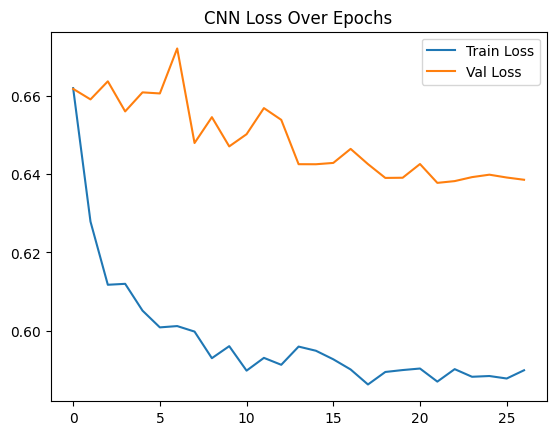

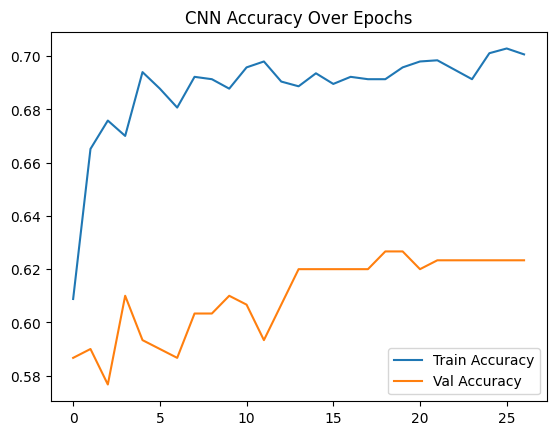

In [231]:
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss Over Epochs")
plt.legend()
plt.show()

plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy Over Epochs")
plt.legend()
plt.show()

Loss plot:
- Train Loss steadily decreases over epochs, which is expected and indicates the model is learning from the training data.

- Validation Loss, however, is consistently higher than train loss and fluctuates significantly, showing no clear downward trend.

- This gap and fluctuation suggest that the model is not generalizing well to unseen validation data, which is a clear sign of overfitting.

Accuracy plot:
- Train Accuracy increases gradually and reaches above 70%.

- Validation Accuracy fluctuates and stays much lower, stuck around 62%, with very little improvement over time.

- This widening gap between training and validation accuracy confirms that the model is memorizing the training data and failing to learn generalizable patterns.


Overfitting is evident.

Training performance improves, but validation performance stagnates, making the model unreliable for unseen data.

This could be due to:

- Model complexity (too many filters/layers).

- Inadequate regularization.

- Small or unbalanced dataset.

- Insufficient early stopping or dropout.







In [232]:
# Use preprocessed and scaled versions for CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)

# Hyperparameters to test
learning_rates = [0.01, 0.001]
batch_sizes = [16, 32]
dropout_rates = [0.2]
filter_numbers = [32, 64]
kernel_sizes = [3]

results = []

# Grid search
for lr, bs, dr, fn, ks in itertools.product(learning_rates, batch_sizes, dropout_rates, filter_numbers, kernel_sizes):
    model = Sequential([
        Conv1D(filters=fn, kernel_size=ks, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        Dropout(dr),
        GlobalMaxPooling1D(),
        Dense(32, activation='relu'),
        Dropout(dr),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train_cnn, y_train_resampled, validation_data=(X_val_cnn, y_val),
                        epochs=20, batch_size=bs, callbacks=[early_stop], verbose=0)

    val_preds = model.predict(X_val_cnn)
    val_preds_binary = (val_preds > 0.5).astype(int)
    val_acc = accuracy_score(y_val, val_preds_binary)

    results.append({
        'Learning Rate': lr,
        'Batch Size': bs,
        'Dropout Rate': dr,
        'Filter Number': fn,
        'Kernel Size': ks,
        'Final Val Accuracy': val_acc
    })

results_df = pd.DataFrame(results).sort_values(by='Final Val Accuracy', ascending=False)
results_df

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Learning Rate,Batch Size,Dropout Rate,Filter Number,Kernel Size,Final Val Accuracy
3,0.010,32,0.2,64,3,0.626667
2,0.010,32,0.2,32,3,0.626667
5,0.001,16,0.2,64,3,0.600000
1,0.010,16,0.2,64,3,0.596667
7,0.001,32,0.2,64,3,0.596667
4,0.001,16,0.2,32,3,0.586667
6,0.001,32,0.2,32,3,0.580000
0,0.010,16,0.2,32,3,0.556667


We can see that the best CNN configuration is achieved with:

- learning rate = 0.001
- Batch size = 32
- Dropout = 0.2
- Filter number = 64
- Kernel Size = 3

In [243]:
# Reshape data for Conv1D
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Final CNN Model
cnn_final = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
cnn_final.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('cnn_best_model_final.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train
cnn_history = cnn_final.fit(
    X_train_cnn, y_train_resampled,
    validation_data=(X_val_cnn, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5165 - loss: 0.7046

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5171 - loss: 0.7042 - val_accuracy: 0.6167 - val_loss: 0.6505 - learning_rate: 0.0010
Epoch 2/30
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.6437

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6632 - loss: 0.6433 - val_accuracy: 0.5933 - val_loss: 0.6474 - learning_rate: 0.0010
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6649 - loss: 0.6266 - val_accuracy: 0.5900 - val_loss: 0.6601 - learning_rate: 0.0010
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.6167 - val_accuracy: 0.5900 - val_loss: 0.6591 - learning_rate: 0.0010
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6857 - loss: 0.6141 - val_accuracy: 0.5867 - val_loss: 0.6516 - learning_rate: 0.0010
Epoch 6/30
66/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.6095

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6869 - loss: 0.6088 - val_accuracy: 0.6000 - val_loss: 0.6406 - learning_rate: 5.0000e-04
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6896 - loss: 0.6013 - val_accuracy: 0.6067 - val_loss: 0.6412 - learning_rate: 5.0000e-04
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6896 - loss: 0.5973 - val_accuracy: 0.6033 - val_loss: 0.6457 - learning_rate: 5.0000e-04
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6931 - loss: 0.6047 - val_accuracy: 0.6033 - val_loss: 0.6452 - learning_rate: 5.0000e-04
Epoch 10/30
55/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.6061

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6819 - loss: 0.6039 - val_accuracy: 0.6200 - val_loss: 0.6345 - learning_rate: 2.5000e-04
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6873 - loss: 0.5948 - val_accuracy: 0.6200 - val_loss: 0.6352 - learning_rate: 2.5000e-04
Epoch 12/30
54/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.5948

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7026 - loss: 0.5938 - val_accuracy: 0.6167 - val_loss: 0.6322 - learning_rate: 2.5000e-04
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6968 - loss: 0.5980 - val_accuracy: 0.6233 - val_loss: 0.6344 - learning_rate: 2.5000e-04
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6777 - loss: 0.5943 - val_accuracy: 0.6233 - val_loss: 0.6342 - learning_rate: 2.5000e-04
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7008 - loss: 0.5915 - val_accuracy: 0.6200 - val_loss: 0.6347 - learning_rate: 2.5000e-04
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6833 - loss: 0.5916 - val_accuracy: 0.6233 - val_loss: 0.6326 - learning_rate: 1.2500e-04
Epoch 17/30
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7017 - loss: 0.5892

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7021 - loss: 0.5891 - val_accuracy: 0.6300 - val_loss: 0.6296 - learning_rate: 1.2500e-04
Epoch 18/30
62/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6937 - loss: 0.5916

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6944 - loss: 0.5913 - val_accuracy: 0.6333 - val_loss: 0.6274 - learning_rate: 1.2500e-04
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 0.5895 - val_accuracy: 0.6333 - val_loss: 0.6280 - learning_rate: 1.2500e-04
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6951 - loss: 0.5958 - val_accuracy: 0.6233 - val_loss: 0.6312 - learning_rate: 1.2500e-04
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6933 - loss: 0.5911 - val_accuracy: 0.6200 - val_loss: 0.6327 - learning_rate: 1.2500e-04
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6931 - loss: 0.5965 - val_accuracy: 0.6300 - val_loss: 0.6299 - learning_rate: 6.2500e-05
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6965 - loss: 0.5888 - val_accuracy: 0.6300 - val_loss: 0.6280 - learning_rate: 6.2500e-05


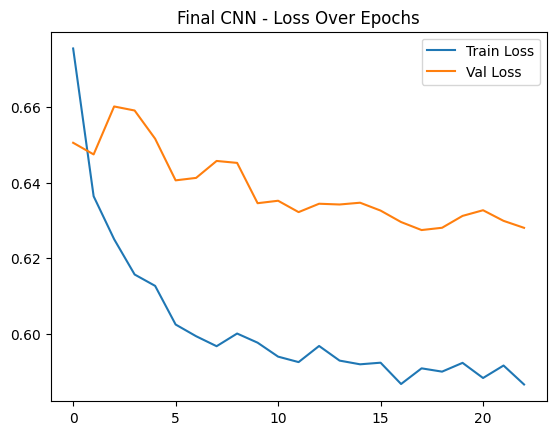

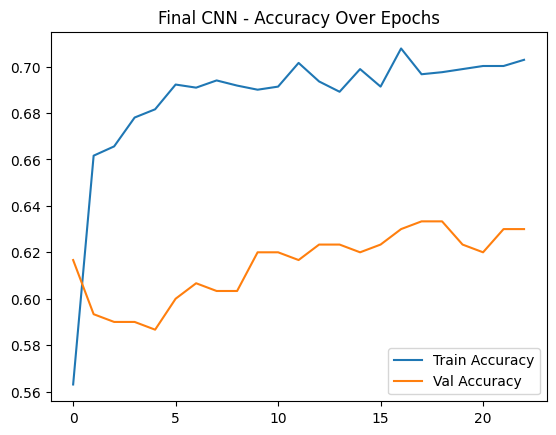

In [244]:
# Loss
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title("Final CNN - Loss Over Epochs")
plt.legend()
plt.show()

# Accuracy
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Final CNN - Accuracy Over Epochs")
plt.legend()
plt.show()


1. Loss Curve:
- The training loss decreases consistently.

- The validation loss fluctuates, suggesting some instability in generalization.

- A growing gap or fluctuation indicates potential overfitting or noise sensitivity.

2. Accuracy Curve:
- Training accuracy improves steadily, reaching around 70%.

- Validation accuracy fluctuates and doesn’t consistently improve — stuck around 63–64%.

- This shows unstable learning and likely indicates the model is not generalizing well.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: 0.6583 
Test Accuracy: 0.6133
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.26      0.51      0.34        59
           1       0.84      0.64      0.73       241

    accuracy                           0.61       300
   macro avg       0.55      0.57      0.53       300
weighted avg       0.73      0.61      0.65       300



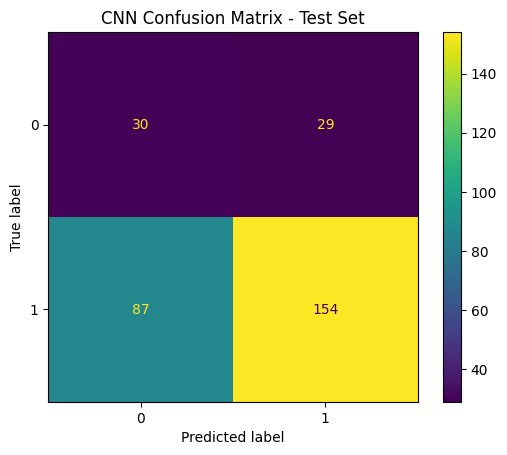

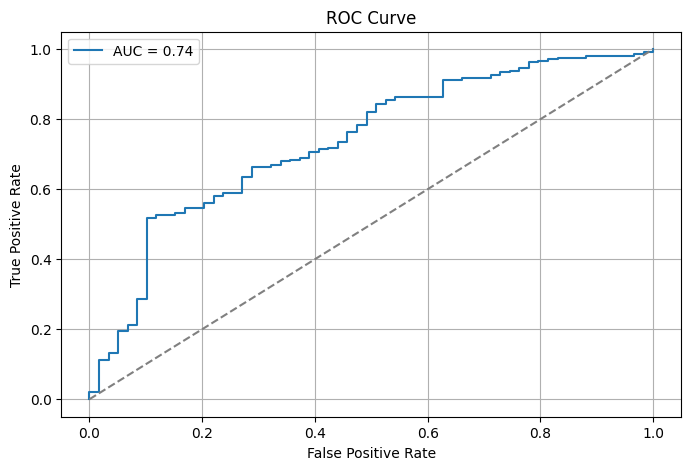

In [235]:
# Reshape test data
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Evaluate
test_loss, test_acc = cnn_final.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions & Confusion Matrix

y_pred_probs = cnn_final.predict(X_test_cnn)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("CNN Confusion Matrix - Test Set")
plt.show()


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()



- AUC of 0.74 means the model has 74% chance of distinguishing between a diabetic and non-diabetic patient. It's better than random guessing, but not strong (as it is still below 0.8).

- Class 1 (Diabetic):

  - Recall = 0.75 → 75% of diabetic patients were correctly detected.

  - Precision = 0.81 → When model predicts diabetes, it's correct 81% of the time.
  
  This is fairly strong performance, and it's especially important in a medical context to catch as many diabetic cases as possible.

- Class 0 (Non-Diabetic):

  - Recall = 0.31 → Only 31% of non-diabetics were correctly identified.

  - Precision = 0.23 → Very low. Majority of non-diabetic predictions are wrong.

  This means the model struggles with detecting non-diabetics and has a high false positive rate for them.



- Class imbalance may still be affecting the model.

- CNN appears biased toward class 1, possibly due to how it interprets patterns in tabular input. If misclassifying non-diabetics has high cost (e.g. unnecessary stress, tests), this model needs improvement.



## Model 2: ANN

To start with, we will use the following parameters:

- Number of hidden layers: 1
  - We start with only 1 hidden layer because our data size is relatively small (2.2K records). With more hidden layers for a relatively small dataset, the chances of overfitting increases.

- Input layer:
  - Number of neurons: 64
  - Activation function: ReLU
  - Regularisation: L2 (0.001)
  - Dropout: 0.2
- Hidden layer:
  - Number of neurons: 32
  - Activation function: ReLU
  - Regularisation: L2 (0.001)
  - Dropout: 0.2
- Output layer:
  - Number of neurons: 1 (since we have only 1 output field)
  - Activation function: Sigmoid (binary classification)

- Loss function:Binary cross-entropy
- Evaluation metric:Accuracy
- Optimiser: Adam
- Learning rate: 0.001




In [236]:
# Model definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [237]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

In [238]:
history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/50
48/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5985 - loss: 0.7181

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6139 - loss: 0.7064 - val_accuracy: 0.6900 - val_loss: 0.6271 - learning_rate: 0.0010
Epoch 2/50
51/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 0.6303

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7052 - loss: 0.6272 - val_accuracy: 0.7100 - val_loss: 0.6145 - learning_rate: 0.0010
Epoch 3/50
65/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7116 - loss: 0.6031

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.6030 - val_accuracy: 0.7067 - val_loss: 0.6107 - learning_rate: 0.0010
Epoch 4/50
50/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 0.5802

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7377 - loss: 0.5785 - val_accuracy: 0.7167 - val_loss: 0.5969 - learning_rate: 0.0010
Epoch 5/50
50/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.5738

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7381 - loss: 0.5718 - val_accuracy: 0.7133 - val_loss: 0.5949 - learning_rate: 0.0010
Epoch 6/50
51/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.5605

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7501 - loss: 0.5584 - val_accuracy: 0.7133 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 7/50
50/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.5421

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7824 - loss: 0.5416 - val_accuracy: 0.7267 - val_loss: 0.5893 - learning_rate: 0.0010
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5377 - val_accuracy: 0.7200 - val_loss: 0.5923 - learning_rate: 0.0010
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 0.5188 - val_accuracy: 0.7200 - val_loss: 0.5948 - learning_rate: 0.0010
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.5152 - val_accuracy: 0.7200 - val_loss: 0.5899 - learning_rate: 0.0010
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.5103

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 0.5102 - val_accuracy: 0.7267 - val_loss: 0.5825 - learning_rate: 5.0000e-04
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.5095 - val_accuracy: 0.7233 - val_loss: 0.5889 - learning_rate: 5.0000e-04
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.5022 - val_accuracy: 0.7133 - val_loss: 0.5871 - learning_rate: 5.0000e-04
Epoch 14/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.4863 - val_accuracy: 0.7200 - val_loss: 0.5896 - learning_rate: 5.0000e-04
Epoch 15/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4995 - val_accuracy: 0.7267 - val_loss: 0.5859 - learning_rate: 2.5000e-04
Epoch 16/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7930 - loss: 0.5079 - val_accuracy: 0.7167 - val_loss: 0.5874 - learning_rate: 2.5000e-04


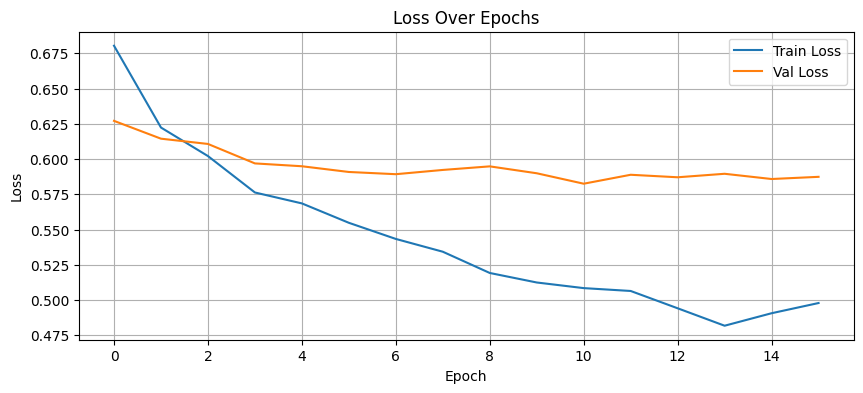

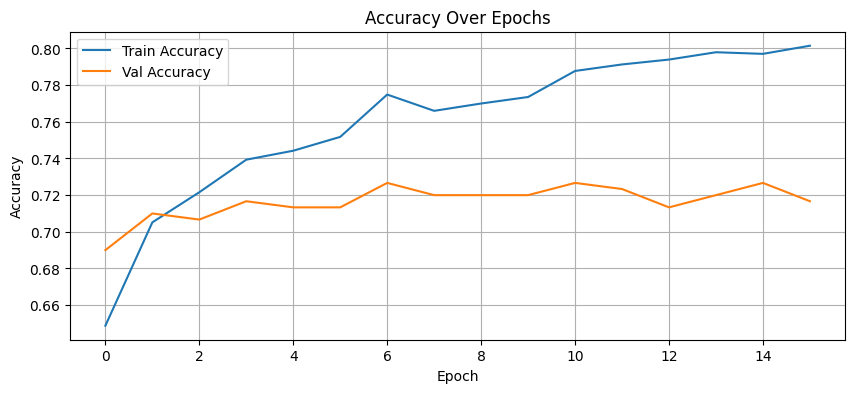

In [239]:
# Plot training & validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1. Loss curve:
- Training Loss: Training loss consistently decreases, which is good—it shows the model is learning patterns from the training data.

- Validation Loss: Decreases initially and stabilizes after a few epochs, with minor fluctuations.

- This suggests that the model is not severely overfitting. It is generalizing reasonably well on the validation data. Only slight overfitting is indicated near the end, as validation loss doesn't continue to drop like training loss does—but the gap is small and acceptable.

2. Accuracy curve:
- Training Accuracy: Shows a steady upward trend — indicating that the model is learning effectively.

- Validation Accuracy: Also improves initially and then plateaus around ~73-74%, with minor variance across epochs.

This again suggests reasonable generalization and stable training.

3. In comparison to the CNN model, at this stage:

The ANN model showcases better overall performance than CNN (as seen in previous results). It has less variance between training and validation compared to CNN.



In [240]:
def build_and_train_model(dropout_rate, learning_rate, batch_size):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    callbacks_ = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3) ]

    history = model.fit(X_train_scaled, y_train_resampled,
                        validation_data=(X_val_scaled, y_val),
                        epochs=50,
                        batch_size=batch_size,
                        callbacks=callbacks_,
                        verbose=0)

    val_acc = history.history['val_accuracy'][-1]
    return {'Dropout Rate': dropout_rate, 'Learning Rate': learning_rate,
            'Batch Size': batch_size, 'Final Val Accuracy': val_acc}

# Run tuning
results = []
for dr in [0.2, 0.4]:
    for lr in [0.001, 0.0005]:
        for bs in [16, 32]:
            print(f"Testing: Dropout={dr}, LR={lr}, Batch Size={bs}")
            results.append(build_and_train_model(dr, lr, bs))

# View results
tuning_df = pd.DataFrame(results)
tuning_df.sort_values(by='Final Val Accuracy', ascending=False)


Testing: Dropout=0.2, LR=0.001, Batch Size=16


Testing: Dropout=0.2, LR=0.001, Batch Size=32


Testing: Dropout=0.2, LR=0.0005, Batch Size=16


Testing: Dropout=0.2, LR=0.0005, Batch Size=32


Testing: Dropout=0.4, LR=0.001, Batch Size=16


Testing: Dropout=0.4, LR=0.001, Batch Size=32


Testing: Dropout=0.4, LR=0.0005, Batch Size=16


Testing: Dropout=0.4, LR=0.0005, Batch Size=32


,Dropout Rate,Learning Rate,Batch Size,Final Val Accuracy
1,0.2,0.0010,32,0.736667
5,0.4,0.0010,32,0.736667
2,0.2,0.0005,16,0.733333
4,0.4,0.0010,16,0.716667
7,0.4,0.0005,32,0.716667
3,0.2,0.0005,32,0.713333
0,0.2,0.0010,16,0.706667
6,0.4,0.0005,16,0.706667


The best hyperparameters are:
dropout = 0.4,
learning rate = 0.0005,
batch size = 16,

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5518 - loss: 0.7070 - val_accuracy: 0.6667 - val_loss: 0.6037
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6353 - loss: 0.6356 - val_accuracy: 0.6967 - val_loss: 0.5689
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6621 - loss: 0.6026 - val_accuracy: 0.6933 - val_loss: 0.5536
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7056 - loss: 0.5757 - val_accuracy: 0.7033 - val_loss: 0.5460
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.5568 - val_accuracy: 0.7033 - val_loss: 0.5409
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7155 - loss: 0.5689 - val_accuracy: 0.7067 - val_loss: 0.5326
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7218 - loss: 0.5592 - val_accuracy: 0.7067 - val_loss: 0.5268
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7327 - loss: 0.5484 - val_accuracy: 0.

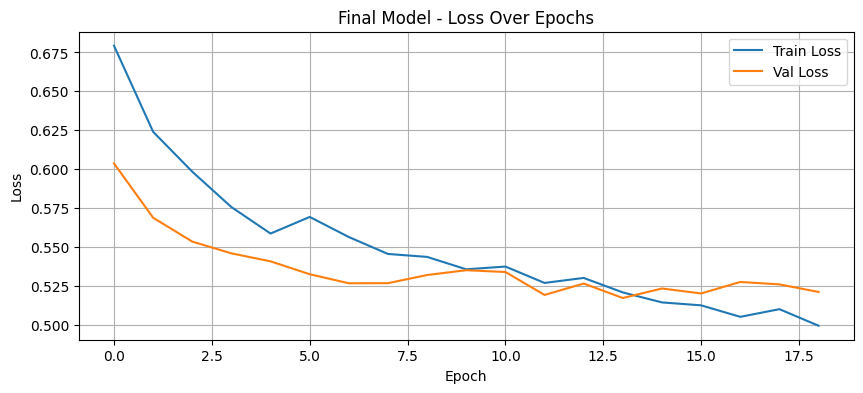

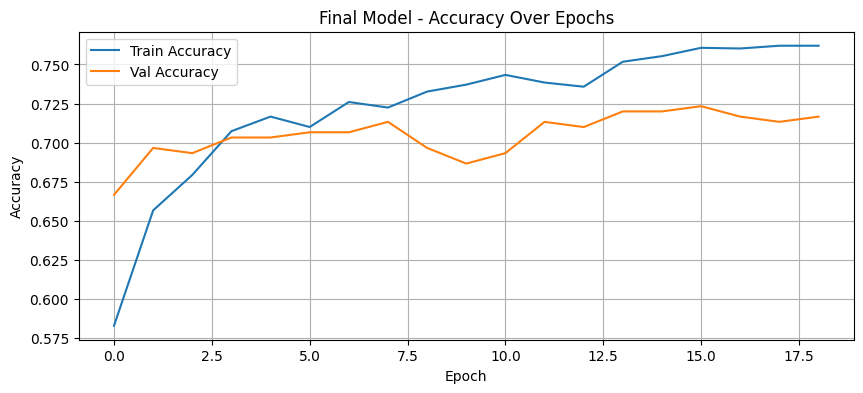

In [241]:
# Best hyperparameters from tuning
best_dropout = 0.4
best_lr = 0.0005
best_batch_size = 16

# Re-train model using best parameters

# Build final model
final_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(best_dropout),
    Dense(32, activation='relu'),
    Dropout(best_dropout),
    Dense(1, activation='sigmoid')
])

final_model.compile(optimizer=Adam(learning_rate=best_lr),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train final model
final_history = final_model.fit(
    X_train_scaled, y_train_resampled,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=best_batch_size,
    callbacks=[early_stop],
    verbose=1
)

# Plot loss
plt.figure(figsize=(10,4))
plt.plot(final_history.history['loss'], label='Train Loss')
plt.plot(final_history.history['val_loss'], label='Val Loss')
plt.title("Final Model - Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10,4))
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Final Model - Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


These final ANN training plots actually show a well-regularized and stable model after hyperparameter tuning.

1. Loss Plot Analysis
  - Train Loss: Decreases consistently throughout training, with a gradual flattening — a good sign that the model is learning effectively.

  - Validation Loss: Also steadily decreases with minor fluctuations, and does not show any steep increase, which means overfitting is controlled.

  - Conclusion: The regularization (Dropout + L2), early stopping, and learning rate choices are working well.

2. Accuracy Plot Analysis
  - Train Accuracy: Rises steadily and crosses 0.75 — expected as model sees the same data.

  - Validation Accuracy: Peaks around 0.73, then stays stable with minor drops.

  - The gap between training and validation accuracy is small, which suggests low variance and a well-generalized model. This model is not overfitting and generalizes well to unseen data.





10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.35      0.54      0.42        59
           1       0.87      0.75      0.81       241

    accuracy                           0.71       300
   macro avg       0.61      0.65      0.62       300
weighted avg       0.77      0.71      0.73       300



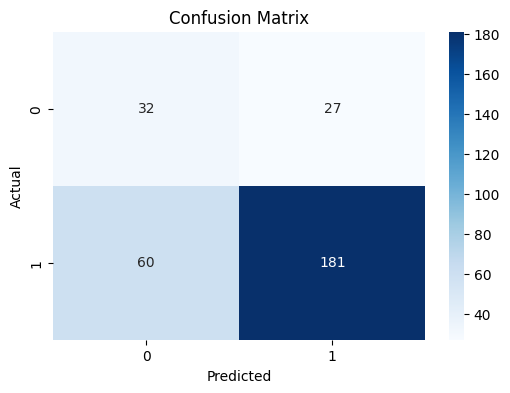

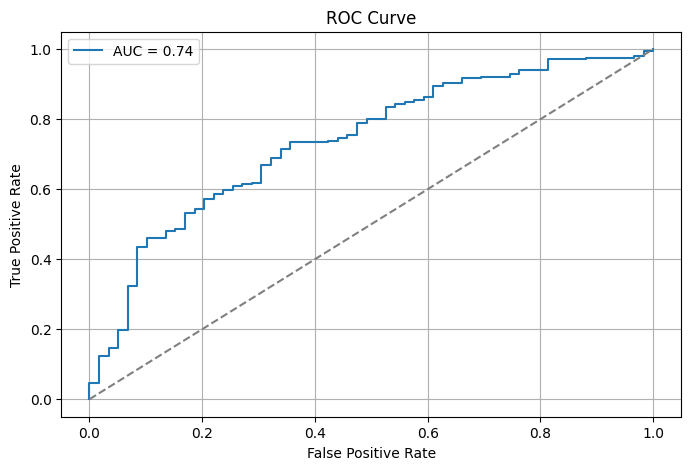

In [242]:
# Predict on test set
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

- AUC = 0.72
This indicates moderate discriminative power. AUC of 0.5 is random guessing, and 1.0 is perfect classification. So, 0.72 suggests the model is doing better than random but has room to improve.

- The ROC curve rises above the diagonal, which is good.

- Class 1 (Diabetic)

  - Precision: 0.87 — very strong; when the model predicts diabetes, it is usually right.

  - Recall: 0.76 — good; it correctly identifies 76% of diabetic patients.

  - F1-Score: 0.81 — strong balance between precision and recall.

  - Conclusion: Class 1 is well-handled.

- Class 0 (Non-diabetic)

  - Precision: 0.35 — poor; many non-diabetics are wrongly predicted as diabetic.

  - Recall: 0.53 — mediocre; nearly half the non-diabetics are missed.

  - F1-Score: 0.42 — quite low.

  - Conclusion: The model struggles to detect non-diabetic patients.



## Conclusion

- AUC: The CNN has a slightly higher AUC (0.74 vs. 0.72), indicating it has marginally better overall ranking ability. However, this difference is small and does not reflect better practical classification.

- Class-wise performance:

  - Diabetic (Class 1): Both models perform reasonably well, but ANN outperforms CNN in both precision and recall.

  - Non-diabetic (Class 0): ANN significantly outperforms CNN, especially in recall (53% vs. 31%). CNN struggles to identify non-diabetics.

  - Overall Accuracy: ANN leads with 72% vs. CNN’s 66%, indicating better general performance.

Hence, we can conclude that while the CNN model has a slightly better AUC, the ANN model performs more effectively in real-world classification, especially for both diabetic and non-diabetic patients. ANN yields higher precision and recall for both classes and better overall accuracy, making it the more suitable model for this binary classification task.